<a href="https://colab.research.google.com/github/girishasharma/python-mini-project/blob/main/remote_work_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Analysis: Impact of Remote Work on Productivity & Work‑Life Balance


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plots
%matplotlib inline

In [9]:
# --- Data Creation ---
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Employee_ID': range(1, n+1),
    'Remote_Work_Type': np.where(np.random.rand(n) < 0.5, 'Fully Remote', 'Hybrid'),
    'Flexibility_Level': np.random.randint(1, 6, size=n),            # 1‑5 scale
    'Productivity_Score': np.random.randint(4, 10, size=n),          # 4‑9 scale
    'Work_Life_Balance': np.random.randint(4, 10, size=n),           # 4‑9 scale
    'Communication_Score': np.random.randint(1, 6, size=n),          # 1‑5 scale
    'Org_Support_Score': np.random.randint(1, 6, size=n)             # 1‑5 scale
})

df.head()

,Employee_ID,Remote_Work_Type,Flexibility_Level,Productivity_Score,Work_Life_Balance,Communication_Score,Org_Support_Score
0,1,Fully Remote,1,4,8,2,3
1,2,Hybrid,4,4,6,1,4
2,3,Hybrid,5,5,7,2,2
3,4,Hybrid,4,9,4,1,1
4,5,Fully Remote,5,5,7,5,5


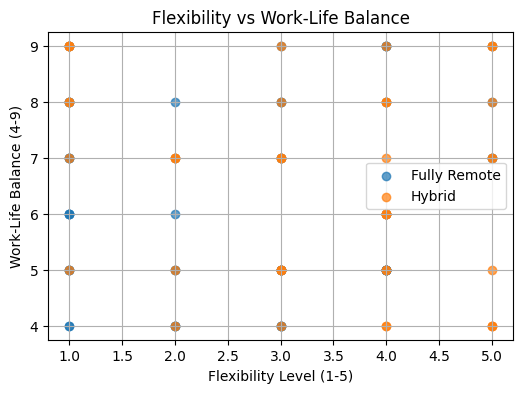

In [10]:
# --- Scatter Plot ---
plt.figure(figsize=(6,4))
for mode in df['Remote_Work_Type'].unique():
    subset = df[df['Remote_Work_Type'] == mode]
    plt.scatter(subset['Flexibility_Level'], subset['Work_Life_Balance'], label=mode, alpha=0.7)
plt.title('Flexibility vs Work‑Life Balance')
plt.xlabel('Flexibility Level (1‑5)')
plt.ylabel('Work‑Life Balance (4‑9)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 600x400 with 0 Axes>

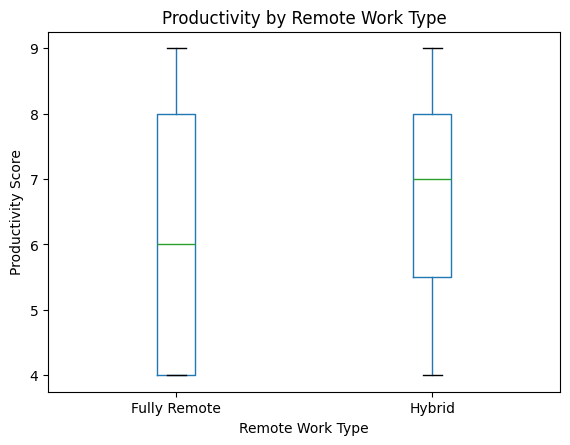

In [11]:
# --- Boxplot ---
plt.figure(figsize=(6,4))
df.boxplot(column='Productivity_Score', by='Remote_Work_Type', grid=False)
plt.title('Productivity by Remote Work Type')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Remote Work Type')
plt.ylabel('Productivity Score')
plt.show()

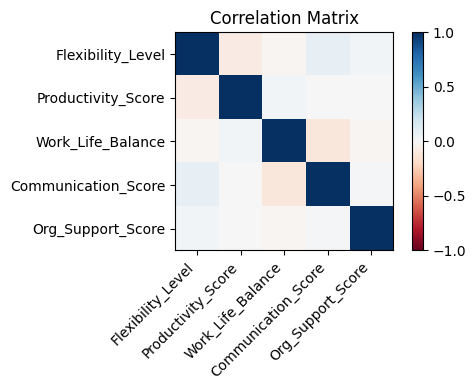

In [12]:
# --- Correlation Heatmap ---
corr = df[['Flexibility_Level','Productivity_Score','Work_Life_Balance',
           'Communication_Score','Org_Support_Score']].corr()
plt.figure(figsize=(6,4))
im = plt.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
# --- Regression: Predicting Productivity ---
import statsmodels.api as sm
X = df[['Flexibility_Level', 'Communication_Score', 'Org_Support_Score']]
y = df['Productivity_Score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Productivity_Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2069
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.891
Time:                        07:20:24   Log-Likelihood:                -200.47
No. Observations:                 100   AIC:                             408.9
Df Residuals:                      96   BIC:                             419.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.8209    

## 🔍 Interpretation & Next Steps
- **Flexibility vs Work‑Life Balance:** Positive trend suggests flexible schedules may help employees balance work and life.
- **Productivity by Work Type:** Compare medians in the boxplot to see which arrangement yields higher scores.
- **Regression:** Coefficients show how strongly each factor predicts productivity.